### **Flowers Classification ML Model Using K-Nearest Neighbors:**
**What Algorithm We Will Use ?**<br>
KNN, or k-nearest neighbors, is a simple machine learning algorithm used for classification and regression tasks. It works by finding the 'k' nearest data points to a new input and making predictions based on their class or average value. It's like asking your neighbors for advice — whatever most of them think is what you'll go with.

**About Our Dataset !**<br>
It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

##### **ML Model Used Libraries :**

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

##### **ML Model Dataset :**

In [2]:
iris_dataset = sns.load_dataset('iris')

##### **Data Overview & Statistics :**

In [3]:
iris_dataset.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
iris_dataset.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
round(iris_dataset.describe(), 2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [7]:
round(iris_dataset.describe(include = 'O'), 2)

,species
count,150
unique,3
top,setosa
freq,50


In [8]:
iris_dataset['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
for flower in iris_dataset['species'].unique() :
    frequency = len(iris_dataset[ iris_dataset['species'] == flower ])
    percentage = round(len(iris_dataset[ iris_dataset['species'] == flower ]) / len(iris_dataset) * 100, 2)
    print(f'{flower} ({frequency}) Frequency With {percentage} %')
    

setosa (50) Frequency With 33.33 %
versicolor (50) Frequency With 33.33 %
virginica (50) Frequency With 33.33 %


##### **Data Exploration & Visualization :**

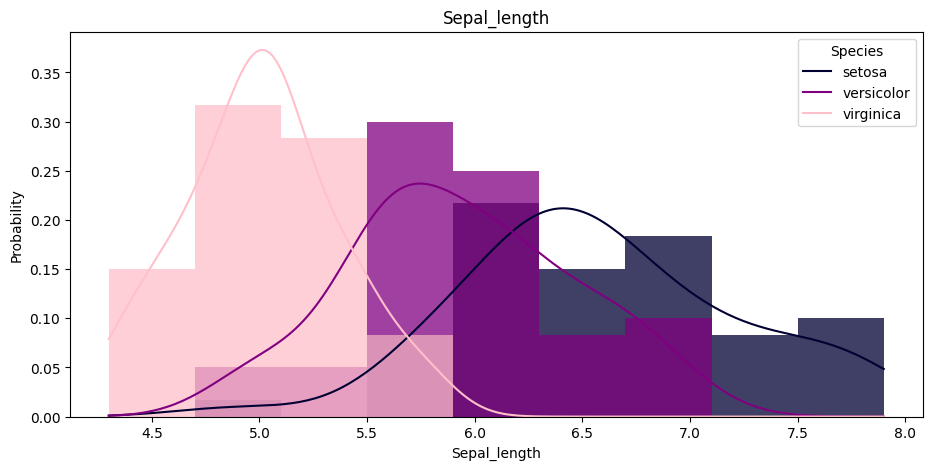

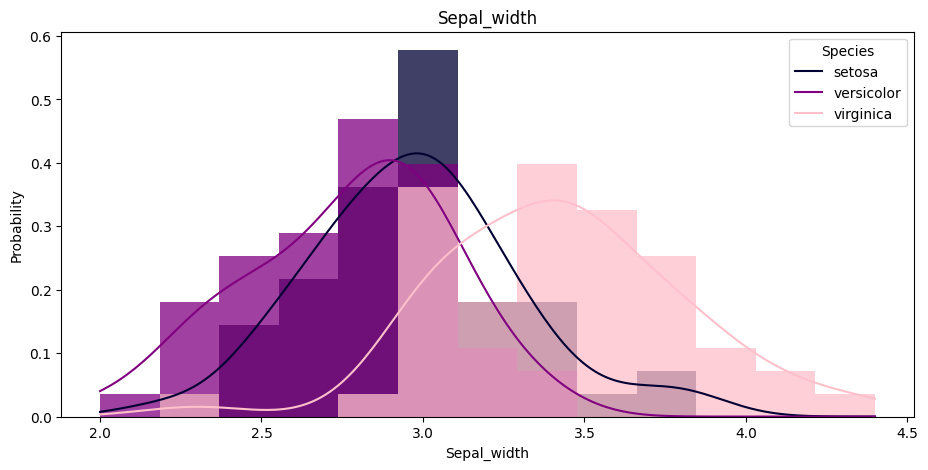

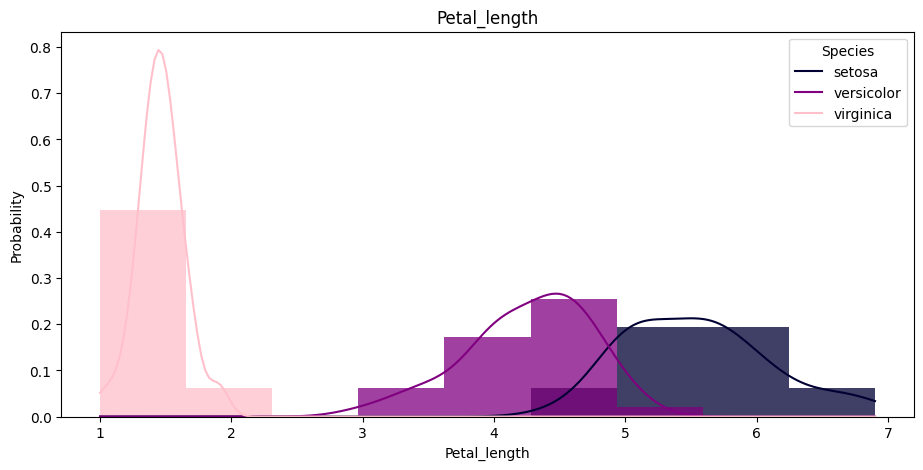

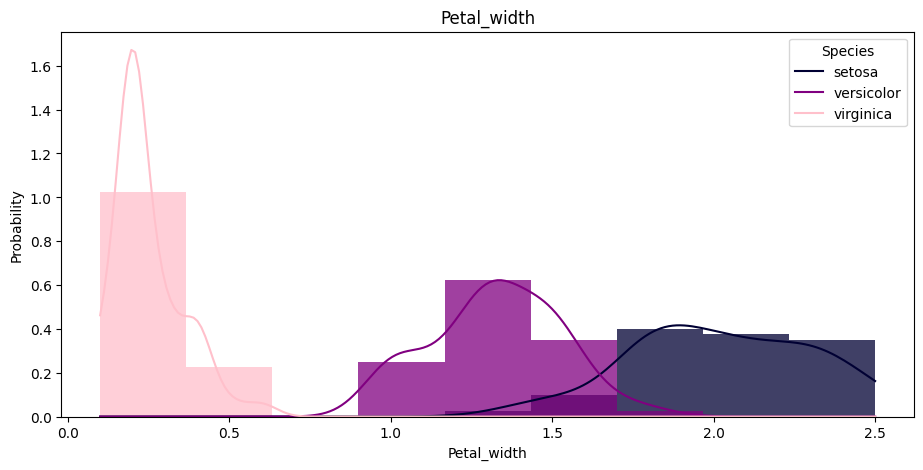

In [10]:
for feature in iris_dataset.columns[:-1]:
    custom_palette = {"setosa": "pink", "versicolor": "purple", "virginica": "#000033"}
    plt.figure(figsize = (11, 5))
    sns.histplot(data = iris_dataset, x = feature, hue = 'species', palette = custom_palette, stat = 'density', kde = True, edgecolor = 'none', alpha = 0.75)
    plt.title(feature.capitalize())
    plt.xlabel(feature.capitalize())
    plt.ylabel('Probability')
    plt.legend(title = 'Species', labels = iris_dataset['species'].unique())
    plt.show()

##### **Data Spilitting :**

In [19]:
features = iris_dataset.drop('species', axis = 1)
target = iris_dataset['species']

##### **Data Preparation :**

In [26]:
x_train, x_test, y_train, y_test = train_test_split(
    features, target,
    test_size = .4, 
    random_state = 42, 
    shuffle = True, 
    stratify = iris_dataset['species'])

##### **Model Training & Fitting :**

In [27]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

##### **Let's Try To Predict :**

In [28]:
predictions = knn_model.predict(x_test)

##### **Model Evaluation :**

In [33]:
acc_score = round(accuracy_score(y_test, predictions))
print(f"Model Accuarcy Score Is {acc_score}")
print(" " * 25)
print(classification_report(y_test, predictions))

Model Accuarcy Score Is 1
                         
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.83      1.00      0.91        20
   virginica       1.00      0.80      0.89        20

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60

